# Gradient Bandit Algorithms

Iván Vallés Pérez - 2018

The idea of this notebook is to run a multiarmed bandits solution based on gradient: Gradient Bandit Algorithms. They will be compared with the Sample Average Multi Armed Bandits as a baseline

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
%matplotlib inline

In [2]:
class TestBed:
    def __init__(self, n_actions, scale):
        self.n_actions = n_actions
        self.actions_q_values = np.random.normal(size=n_actions, scale=scale)
        self.initial_action_q_values = self.actions_q_values
        
    def reset_to_initial_q_values(self):
        np.random.seed(655321)
        self.actions_q_values = self.initial_action_q_values
        
    def update_action_values(self):
        self.actions_q_values = self.actions_q_values + np.random.normal(size=self.n_actions, scale=0.01)
        
    def get_reward(self, action):
        return(np.random.normal(self.actions_q_values[action]))
    
    def get_optimal_reward(self):
        return(np.max(self.actions_q_values))
    
    def get_optimal_action(self):
        return(np.argmax(self.actions_q_values))

In [3]:
env = TestBed(1000, scale=0.75)
print("Optimal action value achievable: {}\nOptimal action: {}"
      .format(env.get_optimal_reward(), env.get_optimal_action()))

Optimal action value achievable: 2.2706495772045683
Optimal action: 291


In [4]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
epsilons = []
lamb = 1-1/100000
epsilon =0.5

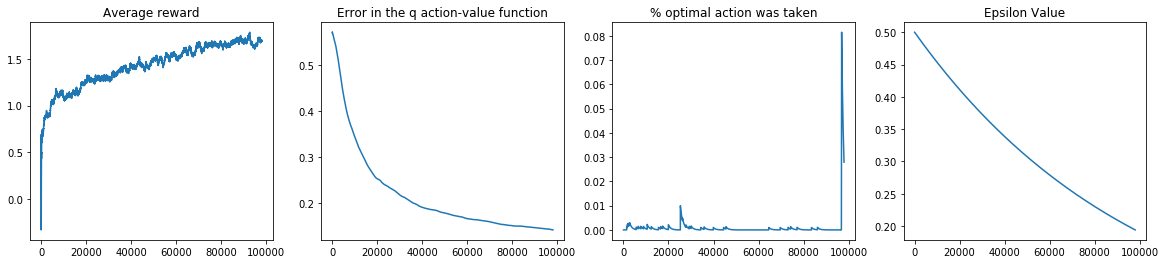

In [5]:
for episode in range(100000):
    epsilon = epsilon * lamb +  0.01 * (1-lamb) # Epsilon exponential decaying
    rand_epsilon = random.random()
    if rand_epsilon > epsilon:
        # Greedy
        action = np.argmax(q)
        reward = env.get_reward(action)
    else:
        # Random
        action = random.randint(0, env.n_actions-1)
        reward = env.get_reward(action)
    n[action] = n[action] + 1
    q[action] = q[action] + (1.0/n[action])*(reward-q[action])
    epsilons.append(epsilon)
    actions.append(action)
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions==env.get_optimal_action()).ewm(span=2000).mean())
        plt.title("% optimal action was taken")
        plt.subplot(144)
        plt.plot(pd.Series(epsilons))
        plt.title("Epsilon Value")

        plt.show()

In [6]:
softmax = lambda x: np.exp(x)/np.sum(np.exp(x))

In [7]:
avg_reward=0
h = np.zeros(env.n_actions)
n = np.ones(env.n_actions)
actions = [1/env.n_actions]
confidence=[0]
rewards = [0]
alpha = 0.1
epsilons = []
lamb = 1-1/100000

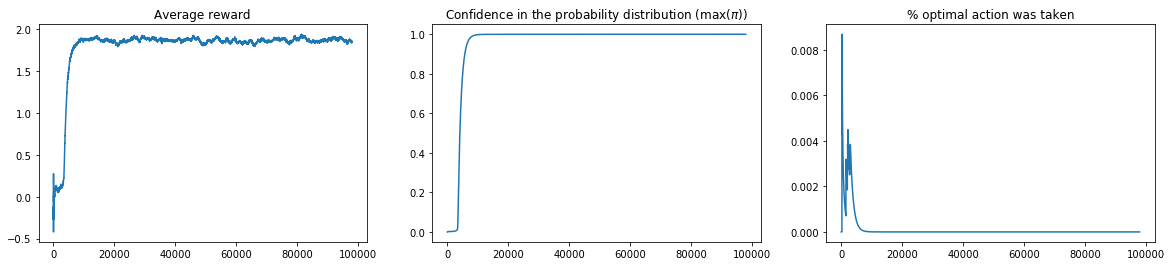

In [8]:
for episode in range(100000):
    pi = softmax(h)

    action = np.random.choice(range(len(pi)), p=pi)
    ohe_action = np.zeros(env.n_actions)
    np.put(ohe_action, action, 1)
    reward = env.get_reward(action)
    n[action] = n[action] + 1
    avg_reward = avg_reward + (1.0/(episode+1))*(reward-avg_reward)
    update = alpha*(reward-avg_reward)*(1-pi)*ohe_action \
            - alpha*(reward-avg_reward)*pi*(1-ohe_action)
    h = h+update
    actions.append(action)
    rewards.append(reward)
    confidence.append(np.max(pi))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(131)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.title("Average reward")
        plt.subplot(132)
        plt.plot(pd.Series(confidence).ewm(span=2000).mean())
        plt.title("Confidence in the probability distribution (max($\pi$))")
        plt.subplot(133)
        plt.plot(pd.Series(actions==env.get_optimal_action()).ewm(span=2000).mean())
        plt.title("% optimal action was taken")


        plt.show()